# Bond Graph Tools Tutorial 1

## Part 1: Installing BondGraphTools

### Setup:
Install BondGraphTools v0.3 from PyPI using `pip install BondGraphTools`

### Import:
Import the BondGraphTools package. Initially, we will be using the new, draw and simulate functions.

This may take a while on first import, as it will download and build the required Julia libraries.

In [1]:
from BondGraphTools import new, draw, simulate, component_manager

## Part 2: Basic modelling

We're going to build and simulate a simple resistor-capacitor system.

All models in BondGraphTools are 'components', and components are created with `new`.
Create a new model and name it 'RC' using the following command:

In [2]:
model = new(name='RLC')

Let us also make a new capacitor with a capacitance of 1 Farad, a 1 Ohm resistor, and a conservation law which we want them to obey (ie; a common voltage). 

In [3]:
C = new("C", value=1)
R = new("R", value=1)
KCL = new("0")

We need to now add the components to our model, and then to wire them up.

In [4]:
from BondGraphTools import add, connect
add(model, R,C,KCL)
connect(R,KCL)
connect(C,KCL)

We can display a basic visualisation of the model using the draw command.

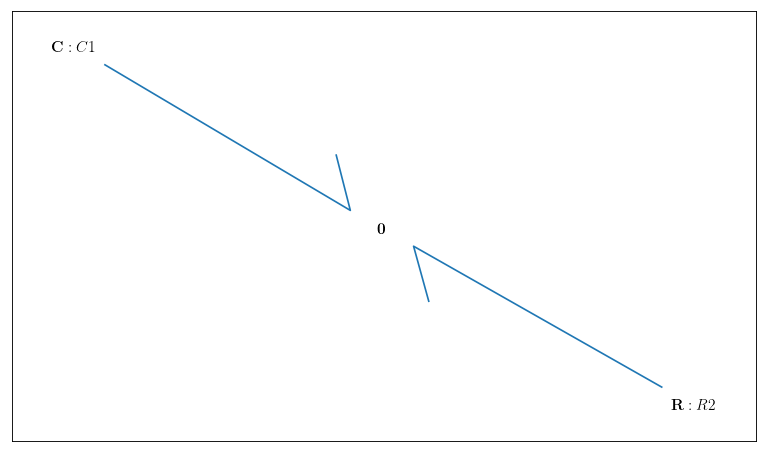

In [5]:
draw(model)

In order to run a simulation, we need to know what the state variables of the system are, so as to select the initial conditions.

We can find this out via:

(Note that 'q_i' corresponds to position-like variables, and 'p_i' correspond to momentum-like variables)

In [6]:
model.state_vars

{'x_0': (C: C1, 'q_0')}

Here we clearly have one state variable `x_0` which corresponds to the accumulated charge.

Hence, our state space is one dimensional.
Let us define intial values and an simulation window, then simulate.

In [7]:
timespan = [0, 5]
x0 = [1]
t, x = simulate(model, timespan=timespan, x0=x0)

and plot the results in a matplotlib figure.

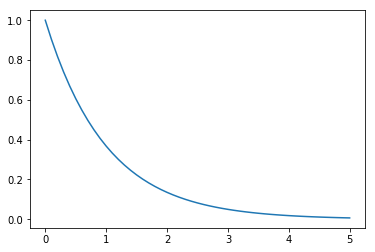

In [8]:
from matplotlib.pyplot import plot
fig = plot(t,x)

Is this right?
Try to derive this by hand and then verify that your derivation has the same constitutive relation as the model.

The constitutive relaiton $\Phi(x)=0$ can be produced via:

In [9]:
model.constitutive_relations

[dx_0 + x_0]

## Part 3: Basic Control

Now, let us add some additional components.
In particular, we want to add a modulated current source.

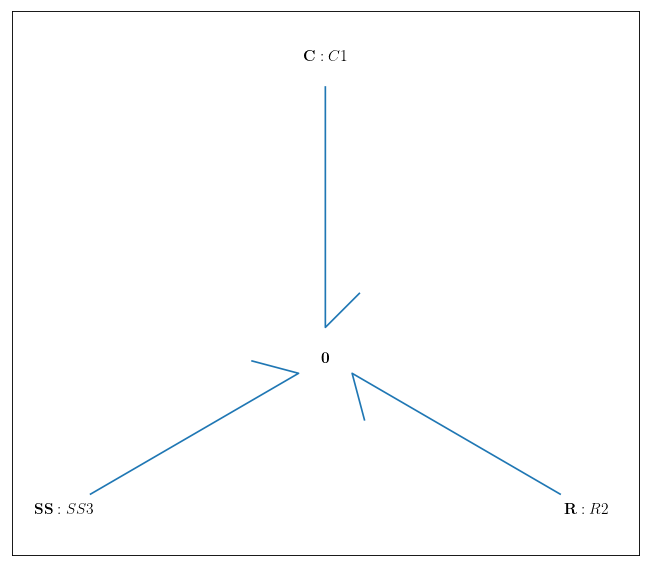

In [10]:
Sf = new('Sf')
add(model, Sf)
connect(Sf, KCL)
draw(model)

Since we've not specified the value of the `Sf` component, it has been added to the control variables:

`u_0` 

In [11]:
model.control_vars

{'u_0': (SS: SS3, 'f')}

Lets also check the new system relation:

In [12]:
model.constitutive_relations

[dx_0 - u_0 + x_0]

First; lets suppose a constant current:

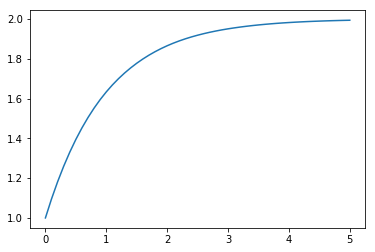

In [13]:
t, x = simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':2})
plot(t,x)

Next, let's suppose we drive it with a sinusional function.

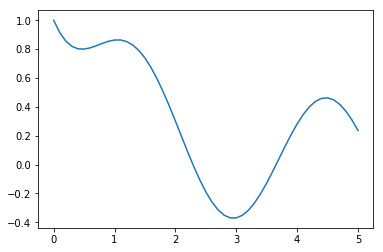

In [14]:
t, x = simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':'sin(2*t)'})
plot(t,x)

A step function?

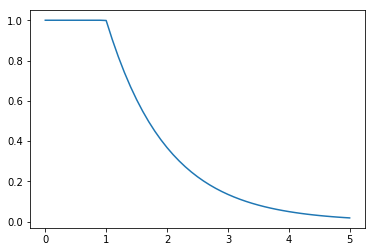

In [15]:
step_fn = 't < 1 ? 1 : 0' # if t < 0 then 1 else 0
t, x = simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':step_fn})
plot(t,x)

One can also use loops to do parameter sweeps

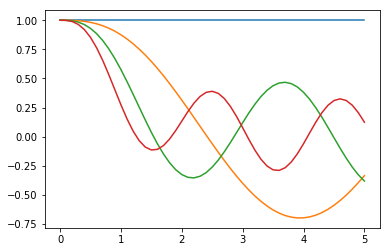

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()

for i in range(4):
    func_text = "cos({i}t)".format(i=i)
    t_i, x_i = simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':func_text})
    plot(t_i,x_i)


## Part 4: ...and when it breaks.

### What to do!
1. Restart your kernal and try again.
2. Come talk to me in my office or via email peter.cudmore@unimelb.edu.au
3. If it is a bug: Add an issue to the github issue list, or email me. Please inculde all your code.